# Alt 1: Run EnsemLLMs step-by-step
Use this option, if postprocessing (after LLM response) needed.

In [1]:
import pandas as pd

%run setup.py    
from ensemble_llms_app import run

# load config for EnsemLLMs app
ensemLLMs = run('init')

Home: /project/DPDS/Xiao_lab/s221963/work/2025_LLMsAgents/example_project_small
['llama31-70b_P07', 'qwen2-72b_P07', 'gpt-4.1-mini_P07', 'gpt-4o-mini_P07', 'medgemma27b_P07']


In [2]:
# launch each specified llm agent app
ensemLLMs.launch()

Start at: 2025-08-31 00:51:52.259262
LLM agent app home: /project/DPDS/Xiao_lab/s221963/work/2025_LLMsAgents/example_project_small/llama31-70b_P07
Model: llama31-70b
Dataset: lung
Start at: 2025-08-31 00:51:52.441769
11:  TCGA-38-4630  
End at: 2025-08-31 00:55:46.793179
Elapsed time: 3.905857 minutes (234.351409 seconds).

Failed requests: []
Failed json loading: 0
[]
Input Tokens: 16801
Output Tokens: 5190
Total Tokens: 21991
Model llama3.1:70b is not in the cost list.

The output csv file saved to /project/DPDS/Xiao_lab/s221963/work/2025_LLMsAgents/example_project_small/llama31-70b_P07/data/lung_llama31-70b_P07.csv.
Computing with llama31-70b for lung succeed.

LLM agent app home: /project/DPDS/Xiao_lab/s221963/work/2025_LLMsAgents/example_project_small/qwen2-72b_P07
Model: qwen2-72b
Dataset: lung
Start at: 2025-08-31 00:55:47.167625
11:  TCGA-38-4630  
End at: 2025-08-31 00:59:54.045617
Elapsed time: 4.114633 minutes (246.877990 seconds).

Failed requests: []
Failed json loading: 0

Loading checkpoint shards:   0%|          | 0/11 [00:00<?, ?it/s]

Model: medgemma27b
Dataset: lung
Start at: 2025-08-31 01:02:36.625295
0:  TCGA-05-4389  Parsing JSON failed. Error: Expecting value: line 1 column 1 (char 0)
Trying to fix json error:
Replace double quotes within a string value with single quotes. - Done.
1:  TCGA-05-4397  Parsing JSON failed. Error: Expecting value: line 1 column 1 (char 0)
Trying to fix json error:
Replace double quotes within a string value with single quotes. - Done.
2:  TCGA-05-4425  Parsing JSON failed. Error: Expecting value: line 1 column 1 (char 0)
Trying to fix json error:
Replace double quotes within a string value with single quotes. - Done.
3:  TCGA-05-4427  Parsing JSON failed. Error: Expecting value: line 1 column 1 (char 0)
Trying to fix json error:
Replace double quotes within a string value with single quotes. - Done.
4:  TCGA-05-4434  Parsing JSON failed. Error: Expecting value: line 1 column 1 (char 0)
Trying to fix json error:
Replace double quotes within a string value with single quotes. - Done.


In [3]:
# postprocessing

for app in ensemLLMs.llm_apps_specs:
    predictor_home_path = os.path.join(ensemLLMs.home_path, f"{app['model_id']}_{ensemLLMs.prompt_id}")
    output_data_filename = f"{ensemLLMs.dataset_id}_{app['model_id']}_{ensemLLMs.prompt_id}"
    output_data_path = os.path.join(predictor_home_path,f"data/{output_data_filename}.csv")
    output_rawdata_path = os.path.join(predictor_home_path,f"data/{output_data_filename}_raw.csv")
    # print(output_data_path)
    
    # infer new categorical value from old one in var 'AF_Diagnosis' for each LLM output ---------------------------
    
    # rename original llm output data file by adding '_raw' in the end
    if not os.path.exists(output_rawdata_path):
        os.rename(output_data_path,output_rawdata_path)
        print(f"Rename {output_data_path} to {output_rawdata_path}, to keep LLM's original output.")
    
    df = pd.read_csv(output_rawdata_path,keep_default_na=False)


    # term_mapping
    term_mapping = {'T1a': 'T1', 'T1b': 'T1', 'T1c': 'T1', 'T2a': 'T2', 'T2b': 'T2', 
    'pT1a': 'T1', 'pT1b': 'T1', 'pT2a': 'T2', 'pT2b': 'T2',
    'pT1': 'T1', 'pT2': 'T2', 'pT3': 'T3', 'pT4': 'T4',
    'TX': 'Unknown', 
    'N1a': 'N1', 'N1b': 'N1', 'N2a': 'N2', 'N2b': 'N2', 
    'pN0': 'N0', 'pN1': 'N1', 'pN2': 'N2', 
    'pN1a': 'N1', 'pN1b': 'N1', 'pN2a': 'N2', 'pN2b': 'N2', 
    'No': 'N0', 'NO': 'N0', 'pNo': 'N0', 'pNO': 'N0', 
    'Nx': 'Unknown', 'NX': 'Unknown',
    'IA': 'Stage I', 'IB': 'Stage I',
    'IIA': 'Stage II', 'IIB': 'Stage II',
    'IIIA': 'Stage III', 'IIIB': 'Stage III',
    'IV': 'Stage IV',
    'Stage IA1': 'Stage I', 'Stage IA2': 'Stage I', 'Stage IA3': 'Stage I',
    'Stage IA': 'Stage I', 'Stage IB': 'Stage I',
    'Stage IIA': 'Stage II', 'Stage IIB': 'Stage II',
    'Stage IIIA': 'Stage III', 'Stage IIIB': 'Stage III',
    'Stage X': 'Unknown', 
    'Lung Adenosquamous Carcinoma': 'Other',   
    'Adenosquamous carcinoma': 'Other',              
    'Adenosquamous Carcinoma': 'Other',   
    'Other, non-small cell carcinoma': 'Other',
    'Other, adenosquamous carcinoma': 'Other',
    '[Discrepancy]': 'Unknown', 
    'Cannot be determined': 'Unknown',
    'Not specified': 'Unknown',
    'Unknown': 'Unknown',
    'nan': 'Unknown',
    '': 'Unknown'                
    }    

    # merge small categories to larger categories
    df['pT_cat'] = (df['pT'].astype(str)).replace(term_mapping)
    df['pT_cat_GT'] = (df['pT_GT'].astype(str)).replace(term_mapping)
    
    df['pN_cat'] = (df['pN'].astype(str)).replace(term_mapping)
    df['pN_cat_GT'] = (df['pN_GT'].astype(str)).replace(term_mapping)
    
    df['tumor_stage_cat'] = (df['tumor_stage'].astype(str)).replace(term_mapping)
    df['tumor_stage_cat_GT'] = (df['tumor_stage_GT'].astype(str)).replace(term_mapping)
    
    df['histologic_diagnosis_cat'] = (df['histologic_diagnosis'].astype(str)).replace(term_mapping)
    df['histologic_diagnosis_cat_GT'] = (df['histologic_diagnosis_GT'].astype(str)).replace(term_mapping)

    # after postprocessing, the var list to be aggregated from each LLM output
    # here, just add in each new category, such as pT_cat
    extended_var_list = ['tumor_size_max_dimension_stated', 
                         'tumor_size_max_dimension', 
                         'tumor_size_max_dimension_CD', 
                         'tumor_size_max_dimension_evidence', 
                         'pT_stated', 
                         'pT', 
                         'pT_cat', 
                         'pT_CD', 
                         'pT_evidence', 
                         'pN_stated', 
                         'pN', 
                         'pN_cat', 
                         'pN_CD', 
                         'pN_evidence', 
                         'tumor_stage_stated', 
                         'tumor_stage', 
                         'tumor_stage_cat', 
                         'tumor_stage_CD', 
                         'tumor_stage_evidence', 
                         'histologic_diagnosis_stated', 
                         'histologic_diagnosis', 
                         'histologic_diagnosis_cat', 
                         'histologic_diagnosis_CD', 
                         'histologic_diagnosis_evidence',
                        ]
    # the new var_val_list used for voting
    var_val_dic_for_voting = {
        "pT_cat": ["T1","T2","T3","T4","Unknown"],
        "pN_cat": ["N0","N1","N2","Unknown"],
        "tumor_stage_cat": ["Stage I","Stage II","Stage III","Stage IV","Unknown"],
        "histologic_diagnosis_cat": ["Lung Adenocarcinoma","Lung Squamous Cell Carcinoma","Other","Unknown"]
    }
    
    df.to_csv(output_data_path, index=False)
    print(f"Save the processed data into {output_data_path}")
    

Rename /project/DPDS/Xiao_lab/s221963/work/2025_LLMsAgents/example_project_small/llama31-70b_P07/data/lung_llama31-70b_P07.csv to /project/DPDS/Xiao_lab/s221963/work/2025_LLMsAgents/example_project_small/llama31-70b_P07/data/lung_llama31-70b_P07_raw.csv, to keep LLM's original output.
Save the processed data into /project/DPDS/Xiao_lab/s221963/work/2025_LLMsAgents/example_project_small/llama31-70b_P07/data/lung_llama31-70b_P07.csv
Rename /project/DPDS/Xiao_lab/s221963/work/2025_LLMsAgents/example_project_small/qwen2-72b_P07/data/lung_qwen2-72b_P07.csv to /project/DPDS/Xiao_lab/s221963/work/2025_LLMsAgents/example_project_small/qwen2-72b_P07/data/lung_qwen2-72b_P07_raw.csv, to keep LLM's original output.
Save the processed data into /project/DPDS/Xiao_lab/s221963/work/2025_LLMsAgents/example_project_small/qwen2-72b_P07/data/lung_qwen2-72b_P07.csv
Rename /project/DPDS/Xiao_lab/s221963/work/2025_LLMsAgents/example_project_small/gpt-4.1-mini_P07/data/lung_gpt-4.1-mini_P07.csv to /project/D

In [4]:
# aggregate each llm agent's opinions
df = ensemLLMs.aggregate(revised_var_list=extended_var_list)



Read in prediction from llama31-70b_P07/data/

Read in prediction from qwen2-72b_P07/data/

Read in prediction from gpt-4.1-mini_P07/data/

Read in prediction from gpt-4o-mini_P07/data/

Read in prediction from medgemma27b_P07/data/

Save the aggregated data into data/lung_small_example_project_aggregated.csv


In [5]:
# vote by llm agents
df_voted = ensemLLMs.vote(df=df,revised_var_val_dict=var_val_dic_for_voting)

Voting by predictors: ['llama31-70b_P07', 'qwen2-72b_P07', 'gpt-4.1-mini_P07', 'gpt-4o-mini_P07', 'medgemma27b_P07']
Vote result saved to data/lung_small_example_project_voted.csv.


# Evaluation

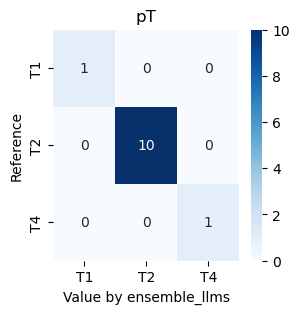

Accuracy: 1.0
Cohen Kappa: 1.0
Cases: 12


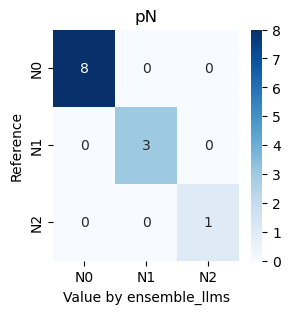

Accuracy: 1.0
Cohen Kappa: 1.0
Cases: 12


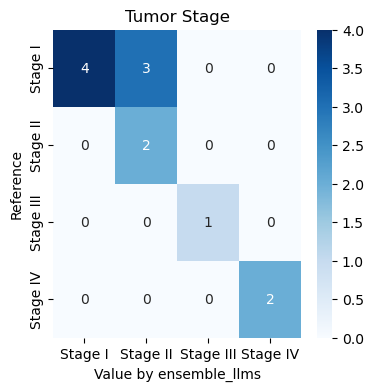

Accuracy: 0.75
Cohen Kappa: 0.6436
F1 (Stage I): 0.7273
Recall (Stage I): 0.5714
Precision (Stage I): 1.0
Jaccard score (Stage I)): 0.5714
F1 (Stage II): 0.5714
Recall (Stage II): 1.0
Precision (Stage II): 0.4
Jaccard score (Stage II)): 0.4
F1 (Stage III): 1.0
Recall (Stage III): 1.0
Precision (Stage III): 1.0
Jaccard score (Stage III)): 1.0
F1 (Stage IV): 1.0
Recall (Stage IV): 1.0
Precision (Stage IV): 1.0
Jaccard score (Stage IV)): 1.0
Cases: 12


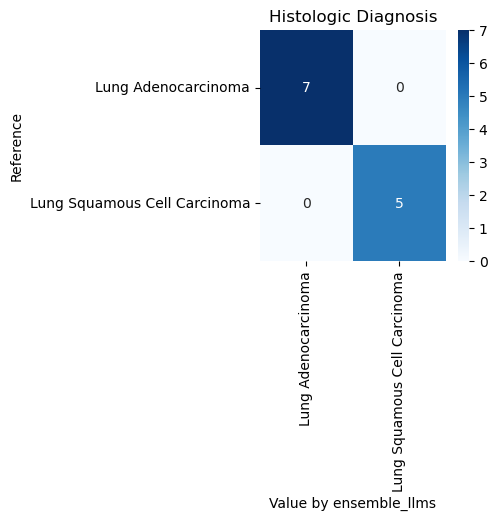

Accuracy: 1.0
Cohen Kappa: 1.0
Cases: 12


In [6]:
# evaluate
from evaluate import *

df_metrics_pT = evaluate_attribute(df=df_voted, 
                                   col_ref='pT_cat_GT', 
                                   col_pred='pT_cat_voted', 
                                   plot_title='pT', 
                                   predictor='ensemble_llms',
                                   # metrics_for_vals=[],
                                  )

df_metrics_pN = evaluate_attribute(df=df_voted, 
                                   col_ref='pN_cat_GT', 
                                   col_pred='pN_cat_voted', 
                                   plot_title='pN', 
                                   predictor='ensemble_llms',
                                   # metrics_for_vals=[],
                                  )

df_metrics_TS = evaluate_attribute(df=df_voted, 
                                   col_ref='tumor_stage_cat_GT', 
                                   col_pred='tumor_stage_cat_voted', 
                                   plot_title='Tumor Stage', 
                                   predictor='ensemble_llms',
                                   metrics_for_vals=['Stage I','Stage II','Stage III','Stage IV'],
                                  )

df_metrics_histo = evaluate_attribute(df=df_voted, 
                                   col_ref='histologic_diagnosis_cat_GT', 
                                   col_pred='histologic_diagnosis_cat_voted', 
                                   plot_title='Histologic Diagnosis', 
                                   predictor='ensemble_llms',
                                   # metrics_for_vals=[],
                                  )


# Alt 2: Run EnsemLLMs end-to-end
Use, when no postprocessing needed

In [ ]:
%run setup.py    
from ensemble_llms_app import run

# launch the ensemble project in one-shot, **if no postprocessing needed**.
run()